# 1. REGRESSION PROBLEMS
------
    In this articles, I want to refer supervised learning's algoriths. These are:

    1.1. Data Preprocessing

    1.2. Regression Problems

        1.2.1. Linear Regression 
        1.2.2. Polynomal Regression
        1.2.3. Support Vector Machine 
        1.2.4. Decision Tree 
        1.2.5. Random Forest 

## 1.1. DATA PREPROCESSING
----
    All machine learning algorithms understand numerical values. So, You have to convert all datas to numerical values.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn 

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
data.dropna(inplace=True)

In [4]:
data = data[:].values

In [5]:
data = pd.DataFrame(data=data, columns=["gender", "group", "level of education", "lunch", "text preparation course", "math score", "reading score", "writing score"])

In [6]:
data

,gender,group,level of education,lunch,text preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:xlabel='group', ylabel='count'>

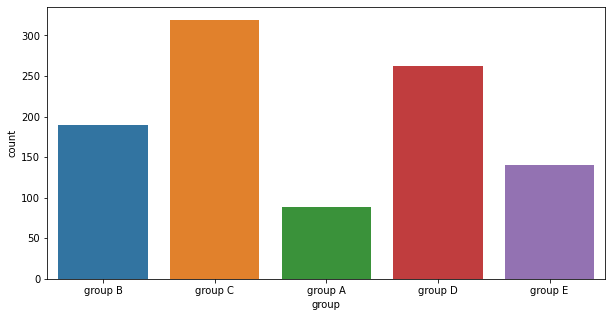

In [7]:
plt.figure(figsize=(10, 5))
sbn.countplot(x="group", data=data)

<AxesSubplot:xlabel='level of education', ylabel='count'>

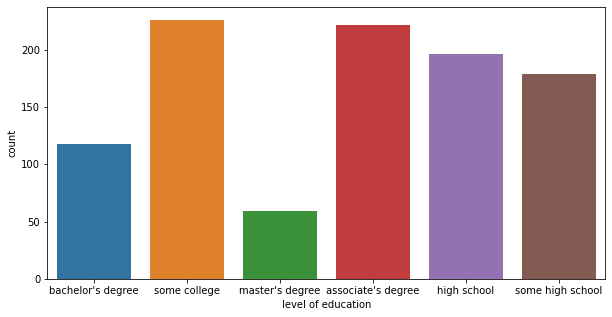

In [8]:
plt.figure(figsize=(10, 5))
sbn.countplot(x="level of education", data=data)

<AxesSubplot:xlabel='lunch', ylabel='count'>

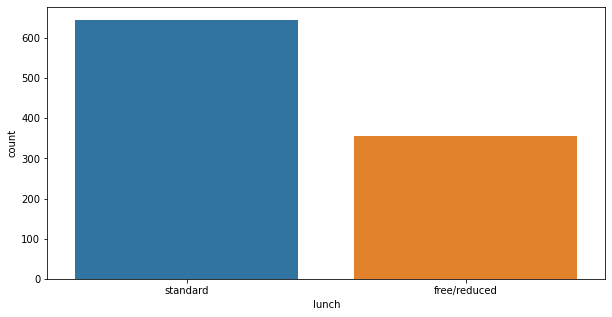

In [9]:
plt.figure(figsize=(10, 5))
sbn.countplot(x="lunch", data=data)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
LE = LabelEncoder()

In [12]:
OHE = OneHotEncoder()

In [13]:
LE_gender = LE.fit_transform(data.iloc[:, 0])

In [14]:
LE_gender = pd.DataFrame(data=LE_gender, columns=["gender"])

In [15]:
LE_gender

,gender
0,0
1,0
2,0
3,1
4,1
...,...
995,0
996,1
997,0
998,0


In [16]:
OHE_group = OHE.fit_transform(data.iloc[:, [1]]).toarray()

In [17]:
OHE_group = pd.DataFrame(data=OHE_group, columns=["group B", "group C", "group A", "group D", "group E"])

In [18]:
OHE_group

,group B,group C,group A,group D,group E
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0
996,0.0,0.0,1.0,0.0,0.0
997,0.0,0.0,1.0,0.0,0.0
998,0.0,0.0,0.0,1.0,0.0


In [19]:
OHE_level_education = OHE.fit_transform(data.iloc[:, [2]]).toarray()

In [20]:
OHE_level_education = pd.DataFrame(data=OHE_level_education, columns=["bachelor's degree", "some college", "master's degree", "associate's degree", "high school", "some high school"])

In [21]:
OHE_level_education

,bachelor's degree,some college,master's degree,associate's degree,high school,some high school
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0
996,0.0,0.0,1.0,0.0,0.0,0.0
997,0.0,0.0,1.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
LE_lunch = LE.fit_transform(data.iloc[:, 3])

In [23]:
LE_lunch = pd.DataFrame(data=LE_lunch, columns=["lunch"])

In [24]:
LE_lunch

,lunch
0,1
1,1
2,1
3,0
4,1
...,...
995,1
996,0
997,0
998,1


In [25]:
LE_test_preparation_course = LE.fit_transform(data.iloc[:, 4])

In [26]:
LE_test_preparation_course = pd.DataFrame(data=LE_test_preparation_course, columns=["test preparation course"])

In [27]:
LE_test_preparation_course

,test preparation course
0,1
1,0
2,1
3,1
4,1
...,...
995,0
996,1
997,0
998,0


In [28]:
data_ = pd.concat([LE_gender, OHE_group, OHE_level_education, LE_lunch, LE_test_preparation_course], axis=1)

In [29]:
data = pd.concat([data_, data.iloc[:, [5, 6, 7]]], axis=1)

In [30]:
data

,gender,group B,group C,group A,group D,group E,bachelor's degree,some college,master's degree,associate's degree,high school,some high school,lunch,test preparation course,math score,reading score,writing score
0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,72,72,74
1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,69,90,88
2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,90,95,93
3,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,47,57,44
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,88,99,95
996,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,62,55,55
997,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,59,71,65
998,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,68,78,77


In [31]:
data.describe()

,gender,group B,group C,group A,group D,group E,bachelor's degree,some college,master's degree,associate's degree,high school,some high school,lunch,test preparation course
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.089000,0.190000,0.319000,0.262000,0.140000,0.222000,0.11800,0.196000,0.059000,0.226000,0.179000,0.645000,0.642000
std,0.499926,0.284886,0.392497,0.466322,0.439943,0.347161,0.415799,0.32277,0.397167,0.235743,0.418448,0.383544,0.478753,0.479652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
data.corr()

,gender,group B,group C,group A,group D,group E,bachelor's degree,some college,master's degree,associate's degree,high school,some high school,lunch,test preparation course
gender,1.000000,0.071001,-0.028466,-0.063368,0.030566,0.020302,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.021372,-0.006028
group B,0.071001,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,-0.032329,0.006315
group C,-0.028466,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,-0.008257,0.000106
group A,-0.063368,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,-0.003385,-0.012522
group D,0.030566,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,-0.009458,0.055956
group E,0.020302,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,0.054922,0.013221,-0.039494,-0.003180,0.023153,-0.053075,0.052398,-0.059393
bachelor's degree,-0.004835,-0.048658,-0.007238,0.037077,-0.044674,0.054922,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426,0.009102,-0.012668
some college,-0.011638,0.016307,-0.019121,0.015682,-0.020556,0.013221,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,-0.013668,-0.024285
master's degree,0.037952,0.004919,0.069093,0.007977,-0.042118,-0.039494,-0.263746,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,-0.002211,0.074446
associate's degree,-0.046188,-0.033551,-0.056363,0.001630,0.072793,-0.003180,-0.133757,-0.091588,-0.123632,1.000000,-0.135305,-0.116919,-0.027095,0.009933


<AxesSubplot:>

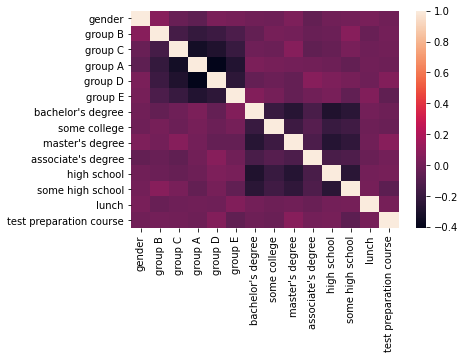

In [33]:
sbn.heatmap(data=data.corr())

-------------

## 1.2. REGRSSION PROBLEMS
----------

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1:], test_size = 1/3, random_state = 1)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()

In [38]:
x_train_sc = sc.fit_transform(x_train)

In [39]:
x_test_sc = sc.fit_transform(x_test)

-----------

### 1.2.1. LINEAR REGRESSION
----------

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(x_test)

In [44]:
y_pred_ = pd.DataFrame(data=y_pred, columns=["Predict Y"])

In [45]:
y_test_ = y_test[:].values

In [46]:
y_test_ = pd.DataFrame(data=y_test_, columns=["Real Y"])

In [47]:
x = pd.concat([y_pred_, y_test_], axis=1)

In [48]:
x

,Predict Y,Real Y
0,54.001033,54
1,67.434060,68
2,74.658934,74
3,58.167716,58
4,56.059416,55
...,...,...
329,80.372320,80
330,60.366334,56
331,89.490276,92
332,69.297169,71


In [49]:
from sklearn.metrics import r2_score

In [50]:
r2 = r2_score(y_pred=y_pred, y_true = y_test)

In [51]:
r2 * 100

94.44340894516355

-----------

### 1.2.2. POLYNOMAL REGRESSION
---------

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [53]:
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(x_poly, y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(poly_reg.fit_transform(x_test))

In [57]:
y_pred_ = pd.DataFrame(data=y_pred, columns=["Predict Y"])

In [58]:
y_test_ = y_test[:].values

In [59]:
y_test_ = pd.DataFrame(data=y_test_, columns=["Real Y"])

In [60]:
x = pd.concat([y_pred_, y_test_], axis=1)

In [61]:
x

,Predict Y,Real Y
0,54.457217,54
1,67.036260,68
2,74.612413,74
3,57.512510,58
4,56.312335,55
...,...,...
329,80.193868,80
330,59.490626,56
331,91.175429,92
332,68.614944,71


In [62]:
from sklearn.metrics import r2_score

In [63]:
r2 = r2_score(y_true=y_test, y_pred=y_pred)

In [64]:
r2 * 100

93.82077440646152

--------------

### 1.2.3. SUPPORT VECTOR MACHINE (SVR)
------------

In [65]:
from sklearn.svm import SVR

In [66]:
# kernel: ("rbf", "poly", "linear", "sigmoid", "precomputed") default: "rbf"
# degree default: "2"
# gamma: ("auto", "scale") default: ("scale")

In [67]:
svr = SVR(kernel="linear")

In [68]:
svr.fit(x_train_sc, y_train)

C:\Users\90545\anaconda3\envs\data science\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [69]:
y_pred = svr.predict(x_test_sc)

In [70]:
y_pred_ = pd.DataFrame(data=y_pred, columns=["Predict Y"])

In [71]:
y_test_ = y_test[:].values

In [72]:
y_test_ = pd.DataFrame(data=y_test_, columns=["Real Y"])

In [73]:
x = pd.concat([y_pred_, y_test_], axis=1)

In [74]:
x

,Predict Y,Real Y
0,54.088988,54
1,66.855399,68
2,74.302929,74
3,58.090996,58
4,54.732312,55
...,...,...
329,79.483992,80
330,59.777658,56
331,89.194464,92
332,68.585225,71


In [75]:
from sklearn.metrics import r2_score

In [76]:
r2 = r2_score(y_pred = y_pred, y_true = y_test)

In [77]:
r2 * 100

94.02507676368887

------------

### 1.2.4. DECISION TREE
----------

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
dt_reg = DecisionTreeRegressor()

In [80]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [81]:
y_pred = dt_reg.predict(x_test)

In [82]:
y_pred_ = pd.DataFrame(data=y_pred, columns=["Predict Y"])

In [83]:
y_test_ = y_test[:].values

In [84]:
y_test_ = pd.DataFrame(data=y_test_, columns=["Real Y"])

In [85]:
x = pd.concat([y_pred_, y_test_], axis=1)

In [86]:
x

,Predict Y,Real Y
0,56.0,54
1,64.0,68
2,80.0,74
3,64.0,58
4,52.0,55
...,...,...
329,78.0,80
330,60.0,56
331,86.0,92
332,69.0,71


In [87]:
from sklearn.metrics import r2_score

In [88]:
r2 = r2_score(y_pred = y_pred, y_true = y_test)

In [89]:
r2 * 100

85.22182229545933

---------

### 1.2.5. RANDOM FOREST
--------

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
rf_reg = RandomForestRegressor()

In [92]:
rf_reg.fit(x_train, y_train)

<ipython-input-92-52f88508f266>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train, y_train)


RandomForestRegressor()

In [93]:
y_pred = rf_reg.predict(x_test)

In [94]:
y_pred_ = pd.DataFrame(data=y_pred, columns=["Predict Y"])

In [95]:
y_test_ = y_test[:].values

In [96]:
y_test_ = pd.DataFrame(data=y_test_, columns=["Real Y"])

In [97]:
x = pd.concat([y_pred_, y_test_], axis=1)

In [98]:
x

,Predict Y,Real Y
0,54.250000,54
1,69.143333,68
2,73.030000,74
3,58.250000,58
4,53.130000,55
...,...,...
329,78.000000,80
330,58.470000,56
331,90.080000,92
332,69.283333,71


In [99]:
from sklearn.metrics import r2_score

In [100]:
r2 = r2_score(y_pred=y_pred, y_true = y_test)

In [101]:
r2 * 100

92.9384139542059

-----------